# Overview
This notebook generates a series of visualization to explore trends in gender representation at the Olympic Games, focusing on female athlete participation and medal outcomes across countries and over time. The plots were created to support a broader analysis and help communicate key findings clearly and effectively for presentation.

All underlying data tables were generated using SQL queries that I wrote as part of the data preparation process. These queries were used to extract, filter, and aggregate data from a structured Olympic dataset to provide the necessary inputs for the analysis.

In [ ]:
# import the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# upload summer table
from google.colab import files
uploaded = files.upload()


Saving summer_table.csv to summer_table.csv


In [ ]:
# upload winter table
from google.colab import files
uploaded = files.upload()

Saving winter_table.csv to winter_table.csv


In [ ]:
# Load the data
summer_df = pd.read_csv('summer_table.csv')
winter_df = pd.read_csv('winter_table.csv')

# Check the DataFrames
print(summer_df.head())
print(winter_df.head())

   Olympic_Year  Percent_Male  Percent_Female
0          1896     100.00000         0.00000
1          1900      98.56224         1.43776
2          1904      98.55596         1.44404
3          1906      99.05331         0.94669
4          1908      98.52587         1.47413
   Olympic_Year  Percent_Male  Percent_Female
0          1924      96.47651         3.52349
1          1928      94.41931         5.58069
2          1932      94.90022         5.09978
3          1936      92.10780         7.89220
4          1948      89.11454        10.88546


In [ ]:
# Add a column to distinguish the seasons
summer_df['Season'] = 'Summer'
winter_df['Season'] = 'Winter'

# Combine the DataFrames
combined_df = pd.concat([summer_df, winter_df])

print(combined_df.head())

   Olympic_Year  Percent_Male  Percent_Female  Season
0          1896     100.00000         0.00000  Summer
1          1900      98.56224         1.43776  Summer
2          1904      98.55596         1.44404  Summer
3          1906      99.05331         0.94669  Summer
4          1908      98.52587         1.47413  Summer


# Percentage of Female Participants in the Olympics
These two line plots display the same data—the percentage of female athletes in the Olympic Games over time (including both Summer and Winter Games)—but with different y-axis scales.



1.   Plot 1 uses a y-axis range of 0 to 50 to highlight finer differences in lower participation rates.
2.   Plot 2 uses a full 0 to 100 scale to show progress toward gender parity.

**Trends by Era:**

In the first 36 years (1896–1932) and the most recent 44 years (1976–2020), the Summer Games consistently had a higher percentage of female athletes than the Winter Games.

During the middle period (1932–1972), this pattern reversed, with the Winter Games generally having a higher share of female participants.



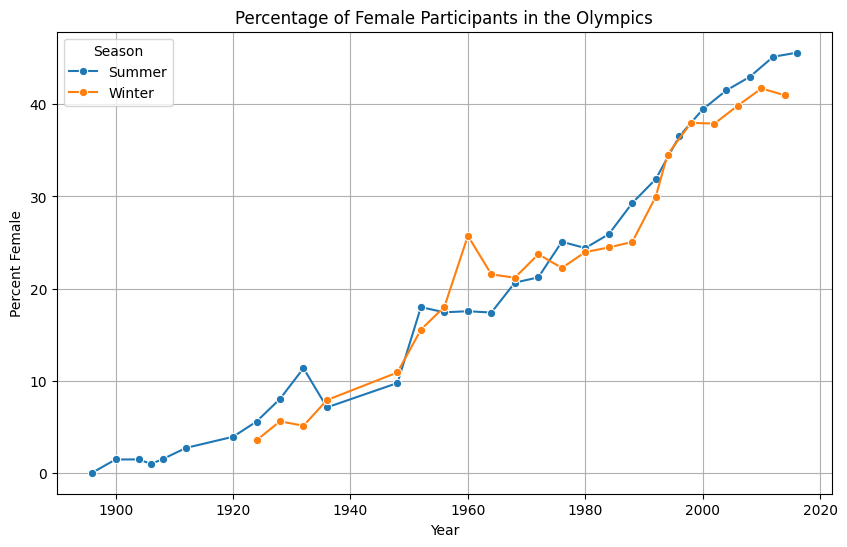

In [ ]:
# Create a line plot with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Olympic_Year', y='Percent_Female', hue='Season', marker='o')

# Add titles and labels
plt.title('Percentage of Female Participants in the Olympics')
plt.xlabel('Year')
plt.ylabel('Percent Female')

# Display the plot
plt.grid(True)
plt.show()


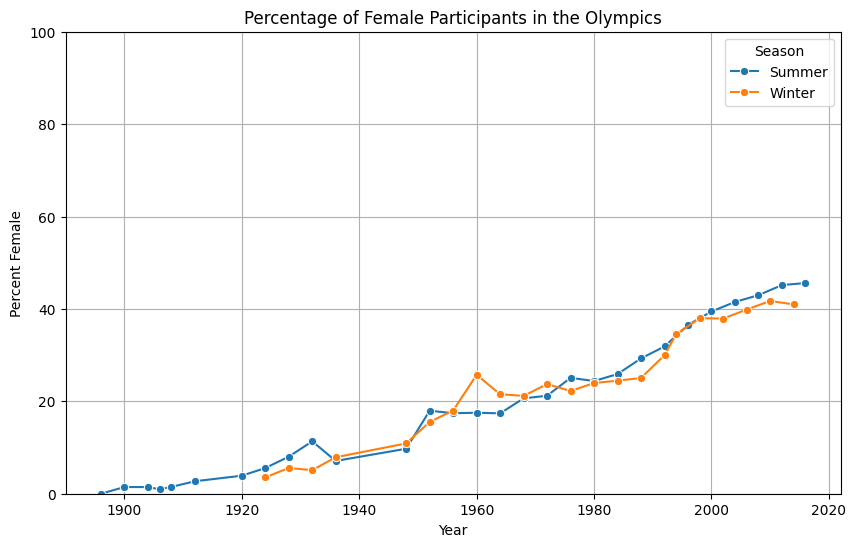

In [ ]:
# Create a line plot with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Olympic_Year', y='Percent_Female', hue='Season', marker='o')

# Add titles and labels
plt.title('Percentage of Female Participants in the Olympics')
plt.xlabel('Year')
plt.ylabel('Percent Female')

# Set y-axis scale from 0 to 100
plt.ylim(0, 100)

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
# upload the overall table
from google.colab import files
uploaded = files.upload()

Saving overall.csv to overall.csv


In [ ]:
# load the data
overall_df = pd.read_csv('overall.csv')
print(overall_df.head())

   Olympic_Year  Percent_Male  Percent_Female
0          1896     100.00000         0.00000
1          1900      98.56224         1.43776
2          1904      98.55596         1.44404
3          1906      99.05331         0.94669
4          1908      98.52587         1.47413


# Percentage of Male and Female Participants Over the Years
This plot shows the long-term trends in gender representation at the Olympics. Female participation rose steadily from 1896 through 2000, reflecting gradual progress in gender inclusion. From 2000 to 2020, the upward trend continued but with more year-to-year fluctuation—though overall, the share of female athletes continued to grow, nearing parity in recent Games.

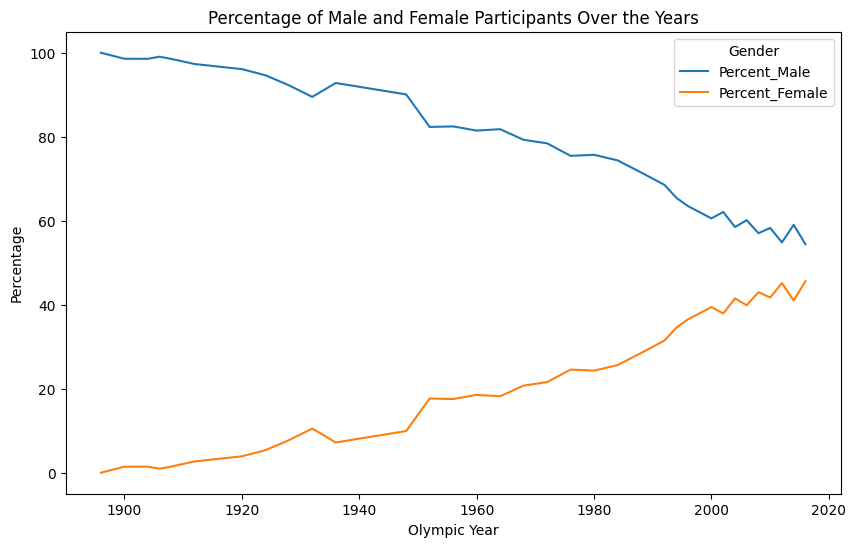

In [ ]:
# Reshape the DataFrame to long-form
long_df = pd.melt(overall_df, id_vars=['Olympic_Year'], value_vars=['Percent_Male', 'Percent_Female'],
                  var_name='Gender', value_name='Percent')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=long_df, x='Olympic_Year', y='Percent', hue='Gender')

# Set plot title and labels
plt.title('Percentage of Male and Female Participants Over the Years')
plt.xlabel('Olympic Year')
plt.ylabel('Percentage')

# Show the plot
plt.show()

In [ ]:
# upload the female medal count table
from google.colab import files
uploaded = files.upload()

Saving female_medal_count.csv to female_medal_count (1).csv


In [ ]:
# load the data
female_medals_df = pd.read_csv('female_medal_count (1).csv')
print(female_medals_df.head())

         Country  Percent_Female_Medals  Female_Medals
0  United States               31.67899         1800.0
1   Soviet Union               27.37430          686.0
2          China               66.01942          680.0
3        Germany               30.21390          678.0
4         Russia               47.55481          564.0


In [ ]:
# ensure the female_medals column is Int
female_medals_df['Female_Medals'] = female_medals_df['Female_Medals'].astype(int)
print(female_medals_df)

         Country  Percent_Female_Medals  Female_Medals
0  United States               31.67899           1800
1   Soviet Union               27.37430            686
2          China               66.01942            680
3        Germany               30.21390            678
4         Russia               47.55481            564


# Two Plots on Medals Won by Female Olympians

**Top Countries by Percentage of Medals Won by Women:**
This plot shows the countries where female athletes earned the highest share of their nation's total Olympic medals across all years. China leads this list, with women winning over 60% of the country’s total medals.

**Total Medal Count Earned by Female Olympians:**
China also ranked third in total medals earned by female athletes, following the United States and the Soviet Union. This indicates both a high volume and strong performance by Chinese women in the Olympics.

<ipython-input-34-75ca281ca049>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-34-75ca281ca049>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


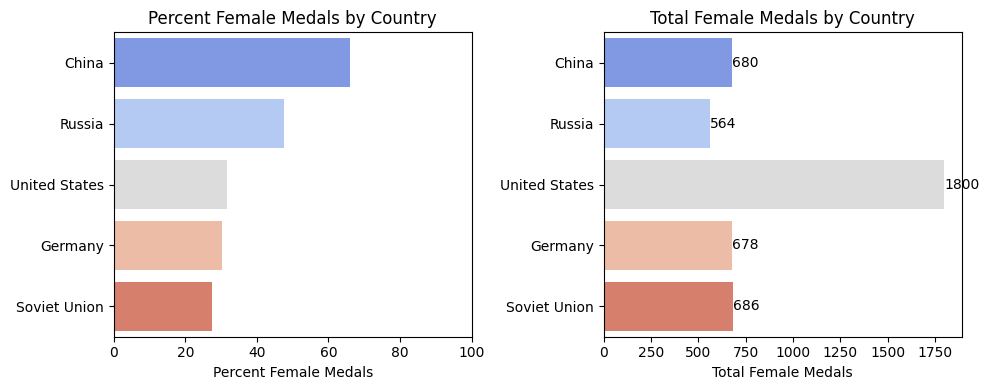

In [ ]:
# Sort the DataFrame based on Percent_Female_Medals
sorted_medals_df = female_medals_df.sort_values('Percent_Female_Medals', ascending=False)

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot for Percent_Female_Medals
sns.barplot(
    x='Percent_Female_Medals',
    y='Country',
    data=sorted_medals_df,
    ax=axes[0],
    palette='coolwarm'  # Use a different color scheme
)
axes[0].set_title('Percent Female Medals by Country')
axes[0].set_xlabel('Percent Female Medals')
axes[0].set_ylabel('')
axes[0].set_xlim(0, 100)  # Set x-axis limits to range from 0 to 100

# Plot for Female_Medals using the same sorted DataFrame
sns.barplot(
    x='Female_Medals',
    y='Country',
    data=sorted_medals_df,
    ax=axes[1],
    palette='coolwarm'  # Use a different color scheme
)
axes[1].set_title('Total Female Medals by Country')
axes[1].set_xlabel('Total Female Medals')
axes[1].set_ylabel('')

# Annotate the Female_Medals chart with labels
for index, value in enumerate(sorted_medals_df['Female_Medals']):
    axes[1].text(
        value,
        index,
        str(value),
        va='center',  # Align text vertically
        ha='left',    # Align text horizontally
        color='black', # Color of the text
        fontsize=10    # Font size of the text
    )

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# upload the top countries table
from google.colab import files
uploaded = files.upload()

Saving top_countries.csv to top_countries.csv


In [ ]:
# load the data
top_countries_df = pd.read_csv('top_countries.csv')
print(top_countries_df.head())

            Country  Percent_Female  Total_Female
0            Kosovo        62.50000             5
1        East Timor        55.55556             5
2             China        53.99618          2824
3             Palau        52.00000            13
4  Marshall Islands        50.00000             7


# Two Plots on Female Olympic Participation

**Percent Female By Country:**
This plot highlights the countries where women made up the highest proportion of the total Olympic team across all years. The top countries—Kosovo, East Timor, China, Palau, Marshall Islands, and Cape Verde—each had female athletes comprising at least 50% of their total Olympic delegation.

**Total Female By Country:**
While these countries had high female representation percentages, their overall athlete counts varied greatly. China stands out with 2,824 female Olympians, demonstrating both high participation and scale. In contrast, the other countries had very small teams, with just 5 to 13 female athletes in total.

<ipython-input-22-4d5fbba2b47f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-22-4d5fbba2b47f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


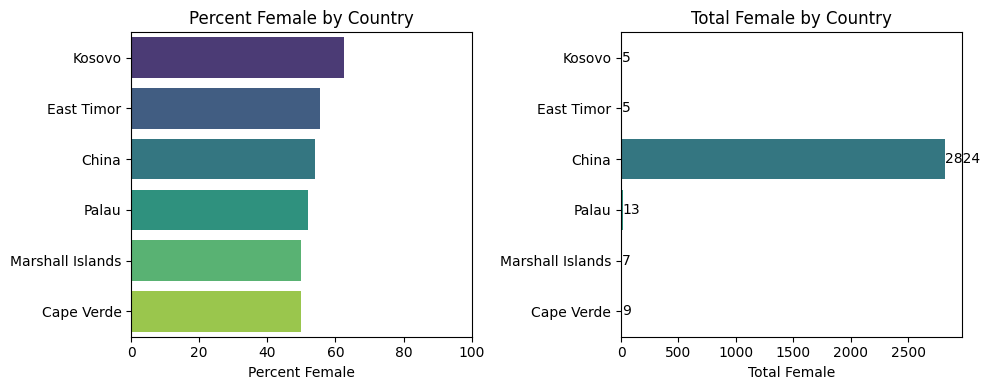

In [ ]:
# Sort the DataFrame based on Percent_Female
sorted_df = top_countries_df.sort_values('Percent_Female', ascending=False)

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot for Percent_Female
sns.barplot(
    x='Percent_Female',
    y='Country',
    data=sorted_df,
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Percent Female by Country')
axes[0].set_xlabel('Percent Female')
axes[0].set_ylabel('')
axes[0].set_xlim(0, 100)  # Set x-axis limits to range from 0 to 100

# Plot for Total_Female using the same sorted DataFrame
sns.barplot(
    x='Total_Female',
    y='Country',
    data=sorted_df,
    ax=axes[1],
    palette='viridis'
)
axes[1].set_title('Total Female by Country')
axes[1].set_xlabel('Total Female')
axes[1].set_ylabel('')

# Annotate the Total_Female chart with labels
for index, value in enumerate(sorted_df['Total_Female']):
    axes[1].text(
        value,
        index,
        str(value),
        va='center',  # Align text vertically
        ha='left',    # Align text horizontally
        color='black', # Color of the text
        fontsize=10    # Font size of the text
    )

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# upload the female medals table
from google.colab import files
uploaded = files.upload()

Saving female_medals.csv to female_medals.csv


In [ ]:
# load the data
fm_df = pd.read_csv('female_medals.csv')
print(fm_df.head())

      Country  Percent_Female_Medals  Female_Medals
0    Zimbabwe                  100.0           21.0
1     Bahrain                  100.0            3.0
2  Montenegro                  100.0           14.0
3      Kosovo                  100.0            1.0
4  Mozambique                  100.0            2.0


In [ ]:
# upload the medal join table
from google.colab import files
uploaded = files.upload()

Saving medal_join.csv to medal_join.csv


In [ ]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving medal_join2.csv to medal_join2.csv


In [ ]:
# upload the medal join all table
from google.colab import files
uploaded = files.upload()

Saving medal_join_all.csv to medal_join_all.csv


In [ ]:
# load the data
mj_df = pd.read_csv('medal_join_all.csv')
print(mj_df.head())

       country  Percent_Female  Percent_Female_Medals  Female_Medals
0       Kosovo        62.50000              100.00000              1
1        China        53.99618               66.01942            680
2  North Korea        49.45455               52.85714             37
3      Vietnam        48.05195               25.00000              1
4      Ukraine        46.32153               52.76382            105


# Scatterplot: Female Medal Share vs. Female Participation Rate
This scatterplot shows the relationship between the percentage of female athletes in each country's Olympic team and the percentage of medals won by those female athletes.

For most countries, women made up less than 40% of their Olympic delegation and won less than 40% of the medals—indicating a relatively low level of gender representation, with medal success on par with represenation.

The dotted line represents parity: countries above the line had a higher share of medals won by women than their share of female athletes. This suggests that, in those countries, female athletes were especially successful relative to their representation.

China, with a large overall medal count, a relatively high proportion of female athletes, and a high percentage of medals earned by women, stands out as a country with both strong female participation and performance.

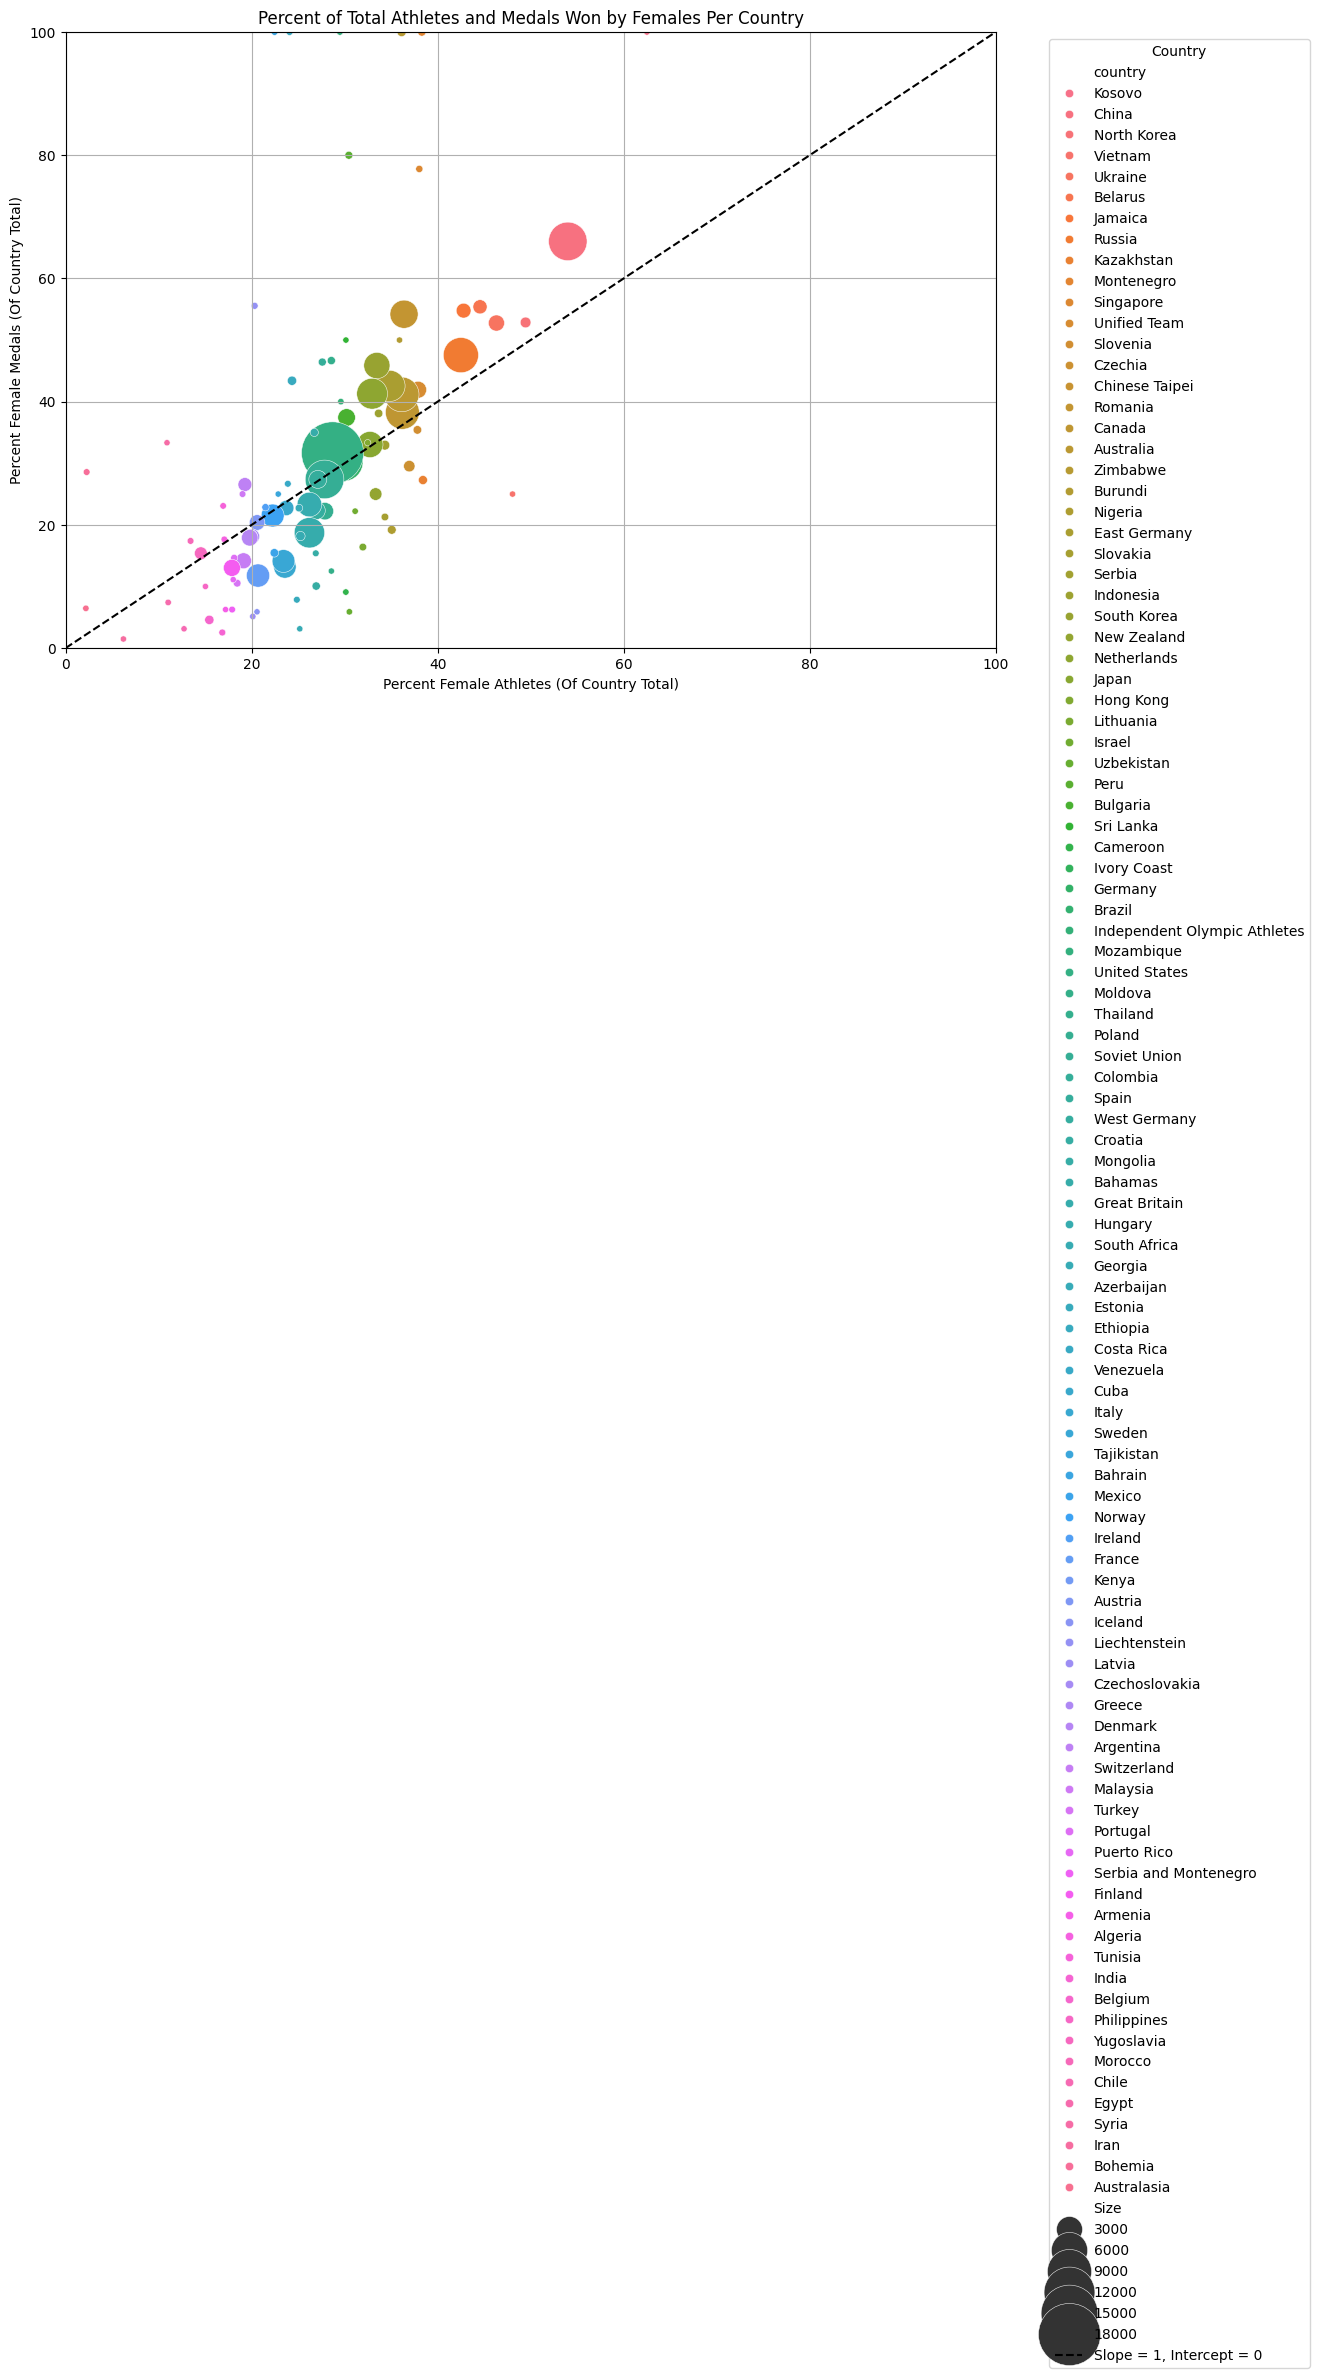

In [ ]:
# Scale the values of 'Female_Medals' for marker sizes
scale_factor = 10
mj_df['Size'] = mj_df['Female_Medals'] * scale_factor

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mj_df, x='Percent_Female', y='Percent_Female_Medals', hue='country', size='Size', sizes=(20, 2000))

# Adding a dotted line with slope = 1 and intercept = 0
plt.plot([0, 100], [0, 100], 'k--', label='Slope = 1, Intercept = 0')  # 'k--' for black dashed line

# Set the limits for the x and y axes
plt.xlim(0, 100)
plt.ylim(0, 100)

# Adding labels and title
plt.xlabel('Percent Female Athletes (Of Country Total)')
plt.ylabel('Percent Female Medals (Of Country Total)')
plt.title('Percent of Total Athletes and Medals Won by Females Per Country')

# Display the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()